In [31]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt


In [32]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1250",
    database="olist"
)

In [33]:
plt.style.use("seaborn-v0_8-pastel")

### Q1. 상품 카테고리별 평균 리뷰 점수

SQL문

In [48]:
q1_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
        AVG(reviews.review_score) AS avg_review_score
    FROM
    	reviews
    INNER JOIN
    	order_items
    ON
    	reviews.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	avg_review_score DESC;
"""

데이터 분석

In [45]:
q1_df = pd.read_sql(q1_sql, conn)
q1_df = q1_df.sort_values(by="avg_review_score", ascending=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_105296\659523529.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q1_df = pd.read_sql(q1_sql, conn)


In [46]:
q1_df

,category_name,avg_review_score
70,security_and_services,2.5000
69,diapers_and_hygiene,3.2564
68,office_furniture,3.4932
67,home_comfort_2,3.6296
66,fashion_male_clothing,3.6412
...,...,...
4,flowers,4.4194
3,costruction_tools_tools,4.4444
2,books_general_interest,4.4463
1,fashion_childrens_clothes,4.5000


데이터 시각화

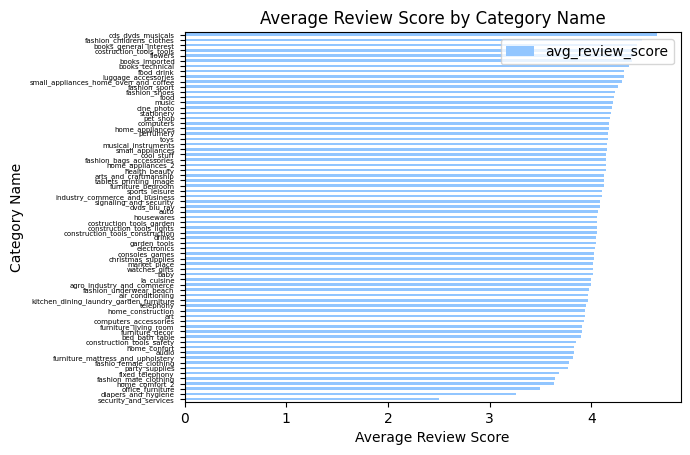

In [47]:
q1_df.plot(kind="barh", x="category_name", y="avg_review_score")
plt.title("Average Review Score by Category Name")
plt.xlabel("Average Review Score")
plt.ylabel("Category Name")
plt.yticks(size=5)
plt.legend()